In [17]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_dataframe.csv"

clean_city_df = pd.read_csv(output_data_file)

In [20]:
clean_city_df = clean_city_df.drop('Unnamed: 0', axis=1)

In [22]:
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,64.89,-23.71,42.48,86,100,14.25,IS,1603232099
1,auki,-8.77,160.70,82.26,78,100,4.68,SB,1603232099
2,cape town,-36.41,-71.90,75.20,29,10,9.17,CL,1603232099
3,port alfred,-7.03,29.76,76.37,64,58,7.38,CD,1603232100
4,englewood,39.65,-104.99,69.01,27,75,10.29,US,1603232076
...,...,...,...,...,...,...,...,...,...
545,boyolangu,62.88,152.43,15.22,94,18,2.91,ID,1603232217
546,fort pierce,-8.12,111.89,76.89,86,87,2.17,NL,1603231998
547,ponta delgada,52.65,6.39,57.00,93,100,4.00,PT,1603232217
548,tambura,38.73,-28.27,59.99,73,78,25.99,SS,1603232217


Text(0.5, 1.0, 'City Latitude vs. Max Temperature 10/20/20')

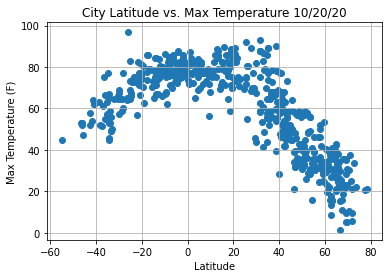

In [23]:
#Latitude vs temperature plot
latitude = clean_city_df['Lat']
temp = clean_city_df['Max Temp']

plt.scatter(latitude, temp)
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature 10/20/20")

Text(0.5, 1.0, 'City Latitude vs. Humidity 10/20/20')

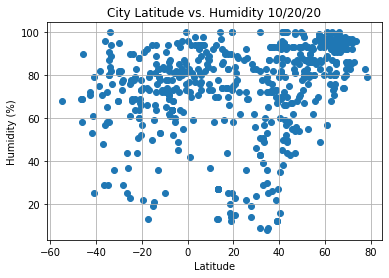

In [24]:
#Latitude vs humidity plot
latitude = clean_city_df['Lat']
humidity_c = clean_city_df['Humidity']

plt.scatter(latitude, humidity_c)
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 10/20/20")

Text(0.5, 1.0, 'City Latitude vs. Cloudiness 10/20/20')

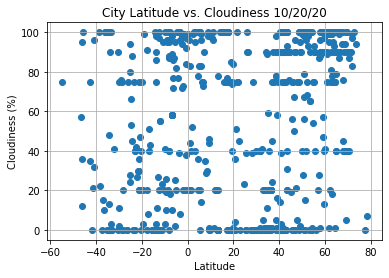

In [25]:
#Latitude vs cloudiness plot
latitude = clean_city_df['Lat']
cloudiness_c = clean_city_df['Cloudiness']

plt.scatter(latitude, cloudiness_c)
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 10/20/20")

Text(0.5, 1.0, 'City Latitude vs. Wind Speed 10/20/20')

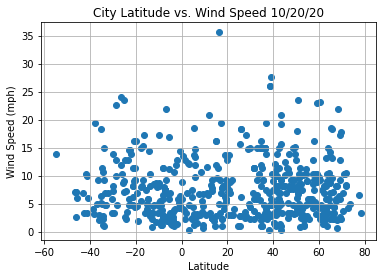

In [26]:
#Latitude vs wind speed plot
latitude = clean_city_df['Lat']
wind_c = clean_city_df['Wind Speed']

plt.scatter(latitude, wind_c)
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed 10/20/20")

The r-value is: -0.862150450305805


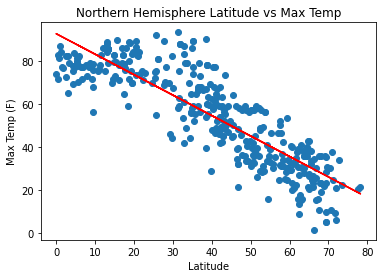

In [30]:
north_h = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Lat']

north_temp = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Max Temp']

x_values = north_h
y_values = north_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere Latitude vs Max Temp")
print(f"The r-value is: {rvalue}")